In [1]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def abs2(x):
    return x.real**2 + x.imag**2


In [3]:
x_max = 1
x_min = -x_max
dx = 0.01

x = np.linspace(x_min,x_max,int((x_max - x_min)/dx) + 1)

N = 11

# Initialize matrix to store evaluated polynomials
N = 11
eval_pols_exact = np.zeros((N,np.size(x)))
eval_pols_scipy = np.zeros((N,np.size(x)))
eval_pols_test1 = np.zeros((N,np.size(x)))
eval_pols_test2 = np.zeros((N,np.size(x)))


In [4]:
m = 0

In [5]:
%%timeit
for n in range(N):
    # L = special.genlaguerre(n,alpha)
    eval_pols_scipy[n] = special.lpmv(m,n,x)


339 µs ± 69.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%%timeit

Ylm = math.sqrt((2*l+1)/(4*math.pi) * math.factorial(l-m) / math.factorial(l+m)) * special.lpmv(m,l,np.cos(THETA)) * np.exp(1j*m*PHI)


4 ms ± 32.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

Ylm_2 = special.sph_harm(m,l,PHI,THETA)


5.61 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
theta = np.linspace(0,math.pi,101)
phi = np.linspace(0,2*math.pi,101)

THETA, PHI = np.meshgrid(theta,phi)

l = 10
m = 3

Ylm = math.sqrt((2*l+1)/(4*math.pi) * math.factorial(l-m) / math.factorial(l+m)) * special.lpmv(m,l,np.cos(THETA)) * np.exp(1j*m*PHI)

Ylm_2 = special.sph_harm(m,l,PHI,THETA)

X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)


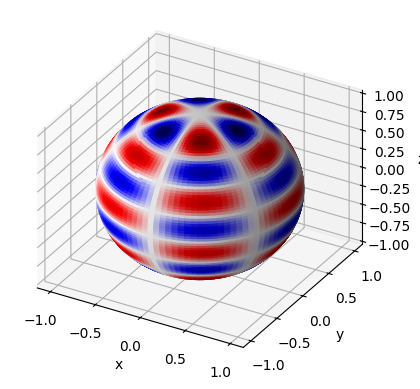

In [7]:
fcolors = Ylm_2.real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=plt.cm.seismic(fcolors))


ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('z')
ax.set_proj_type('ortho')

plt.show()


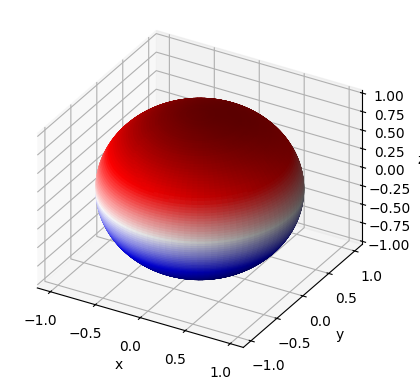

In [8]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import math

# Set up theta and phi for spherical coordinates
theta = np.linspace(0, math.pi, 101)  # polar angle
phi = np.linspace(0, 2 * math.pi, 101)  # azimuthal angle

THETA, PHI = np.meshgrid(theta, phi)

# Spherical Harmonic indices
l = 1
m = 0

# Compute the spherical harmonics
Ylm = np.sqrt((2 * l + 1) / (4 * math.pi) * math.factorial(l - m) / math.factorial(l + m)) \
      * special.lpmv(m, l, np.cos(THETA)) * np.exp(1j * m * PHI)

# Cartesian coordinates of the unit sphere
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# Choose what to visualize: Magnitude, Real part, or Imaginary part of Ylm
# Here, we visualize the real part of Ylm
Ylm_real = np.real(Ylm)

# Normalize the colormap to the range of Ylm values
Ylm_min = Ylm_real.min()
Ylm_max = Ylm_real.max()

# Check if the spherical harmonic is constant (Ylm_min == Ylm_max)
if Ylm_min == Ylm_max:
    # Set a uniform color for the surface in this case
    facecolors = plt.cm.seismic(0.5*np.ones_like(Ylm_real))
else:
    # Normalize the values for the colormap
    facecolors = plt.cm.seismic((Ylm_real - Ylm_min) / (Ylm_max - Ylm_min))

# Create the surface plot with the real part of Ylm as the facecolors
ax.plot_surface(X, Y, Z, facecolors=facecolors, rstride=1, cstride=1)

# Set axis labels and orthographic projection
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_proj_type('ortho')

plt.show()

